In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

# seaborn에서 제공하는 그래프테마
# sns.set_style("ticks")
# sns.set_style("darkgrid")
# sns.set_style("whitegrid")

# 그래프를 그리기 위한 기본 설정
# 폰트설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'

# 폰트설정 - 맥
# plt.rcParams['font.family'] = 'Apple Gothic'

# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6

# 글자 크기
plt.rcParams['font.size'] = 14

# 폰트 설정 시 '-'기호 깨는거 방지하기
plt.rcParams['axes.unicode_minus'] = False

### 타이타닉 사망 생존 데이터
- 타이타닉 호 승객에 관련된 정보
- kaggle에서 제공되는 데이터
- train.csv를 학습시켜 test.csv에 대한 사망 생존을 예측한다.

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('data/test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


- Passengerld : 승객번호. 1부터 1씩 증가시간 값. 의미없음
- Survived : 생존여부. 0-사망, 1-생존
- Pclass : 승객 등급. 1 ~ 3 등급
- Name : 승객 이름
- Sex : 성별. male - 남성, female - 여성
- Age : 승객 나이
- SibSp : 동승한 형제 자매 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실 번호
- Embarked : 선착장. C-Cherbourg, Q-Queenstown, S-Southampton

### 결측치 확인

In [4]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 데이터 전처리

In [7]:
# 처리의 용이성을 위해 두 데이터 프레임을 합친다.
# concat의 경우 한 데이터프레임에 없는 부분을 Null값 처리하여 뽑아준다.
data = pd.concat([train_df, test_df])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
# 인덱스가 0인 게 2개이다.
display(data.loc[0])

# 인덱스를 다시 초기화 한다.
data.reset_index(inplace=True, drop=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
# 전체 결측치 확인
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### PassengerId
- 승객 일련 번호
- 1부터 1씩 증가시킨 값으로 의미가 없다.
- 사용하지 않을 것이다.

### Pclass
- 승객 등급
- 1: 1등급, 2: 2등급, 3: 3등급

In [10]:
# 결측치 확인: 결측치 없음
data['Pclass'].isna().sum()

0

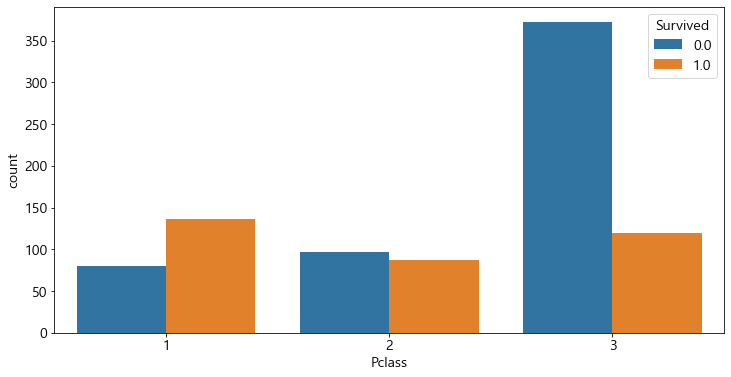

In [11]:
# 시각화
# x에 설정한 컬럼을 기준으로 그룹을 나누고 각 그룹 안에서 hue에 설정한 컬럼을 기준으로 그룹을 나누어 그 수를 계산해 시각화한다.
sns.countplot(x='Pclass', data=data, hue='Survived')
plt.show()

#### 1등석은 생존확률이 높고 3등석은 사망확률이 높다.

### Name
- 이름

In [12]:
# 결측치 확인
data['Name'].isna().sum()

0

In [13]:
data['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [14]:
# LastName 컬럼 추가
data['LastName'] = 0        # 처음에는 일단 아무거나 넣어서 열 생성

In [15]:
# 정규식 : 문자열의 양식을 지정할 때 사용하는 식
# ([A-Za-z]+) : 앞에서부터 대소문자 영문에 해당하는 것 까지만 해당
# 한글 : 가-힣
data['LastName'] = data['Name'].str.extract('([A-Za-z]+)')
data['LastName']

0          Braund
1         Cumings
2       Heikkinen
3        Futrelle
4           Allen
          ...    
1304      Spector
1305        Oliva
1306      Saether
1307         Ware
1308        Peter
Name: LastName, Length: 1309, dtype: object

In [16]:
# LastName의 정보를 파악한다.
data['LastName'].value_counts()

O            12
Sage         11
Andersson    11
Asplund       8
Goodwin       8
             ..
Mangan        1
Nankoff       1
Rosenbaum     1
Hampe         1
Theobald      1
Name: LastName, Length: 853, dtype: int64

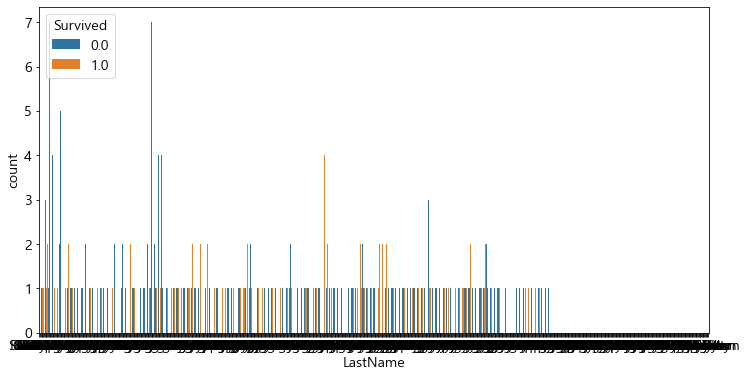

In [17]:
sns.countplot(x='LastName', hue='Survived', data=data)
plt.show()

#### 이름 중 일부는 사망 생존률이 다르다.

### Sex
- 성별
- male: 남성, femail: 여성

In [18]:
# 결측치 확인: 결측치 없음
data['Sex'].isna().sum()

0

In [19]:
# 값 종류 확인
data['Sex'].value_counts().index

Index(['male', 'female'], dtype='object')

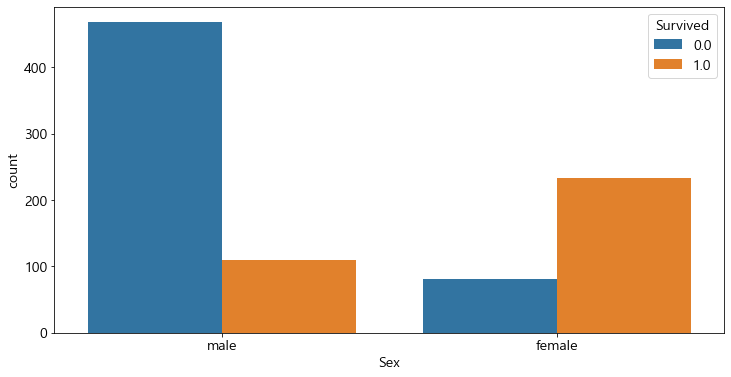

In [20]:
# 시각화
sns.countplot(x='Sex', hue='Survived', data=data)
plt.show()

#### 남성은 사망확률이 높고 여성은 생존확률이 높다.

### Age
- 나이

In [21]:
# 결측치 확인: 결측치 존재
data['Age'].isna().sum()

263

In [22]:
# 이름 중간의 Sir Name을 가져온다.
# ([A-Za-z]+)\. : A-Z, a-z로 구성되어 있고 마지막이 `.`로 끝나는 것.
data['SirName'] = data['Name'].str.extract('([A-Za-z]+)\.')
data['SirName']


0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: SirName, Length: 1309, dtype: object

In [23]:
data['SirName'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Countess      1
Dona          1
Sir           1
Don           1
Lady          1
Jonkheer      1
Capt          1
Mme           1
Name: SirName, dtype: int64

In [24]:
# SirName을 기준으로 나이의 평균을 구한다.
data.groupby('SirName')['Age'].mean()

SirName
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [25]:
# SirName을 기준으로 그룹을 묶는다.
a1 = data.groupby('SirName')['Age']

# 결측치인 부분에 데이터를 평균으로 담아 준다.
data['Age'] = a1.apply(lambda x : x.fillna(x.mean()))
data['Age'].isna().sum()

0

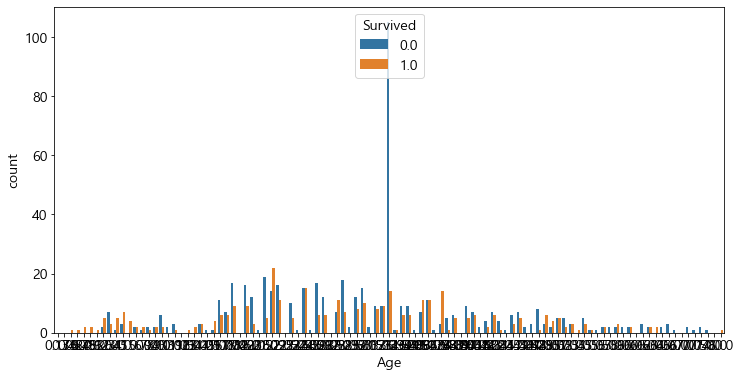

In [26]:
sns.countplot(x='Age', hue='Survived', data=data)
plt.show()

#### 유아기 아이들의 생존 비율이 높다.

### SibSp
- 동승한 형제 자매 수

In [27]:
data['SibSp'].isna().sum()

0

<AxesSubplot:xlabel='SibSp', ylabel='count'>

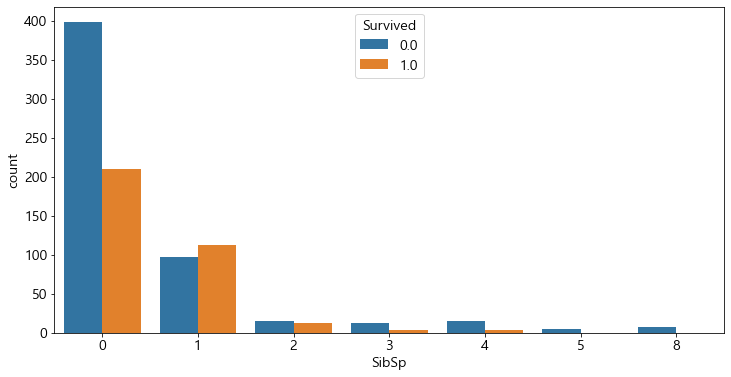

In [28]:
sns.countplot(x='SibSp', hue='Survived', data=data)

#### 동승한 형제 자매수가 1명인 경우 생존률이 올라간다.

#### Parch
- 동승한 부모 자식 수

In [29]:
data['Parch'].isna().sum()

0

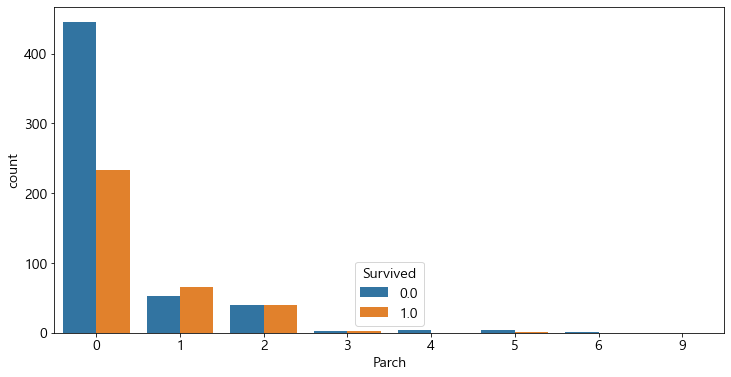

In [30]:
sns.countplot(x='Parch', hue='Survived', data=data)
plt.show()

#### 동승한 부모 자식이 없을 경우 사망율이 올라간다.

### Ticket
- 티켓 번호

In [31]:
# 결측치 확인
data['Ticket'].isna().sum()

0

In [32]:
data['Ticket'].value_counts()

CA. 2343             11
1601                  8
CA 2144               8
3101295               7
347082                7
                     ..
PC 17612              1
STON/O 2. 3101286     1
363592                1
A./5. 2152            1
394140                1
Name: Ticket, Length: 929, dtype: int64

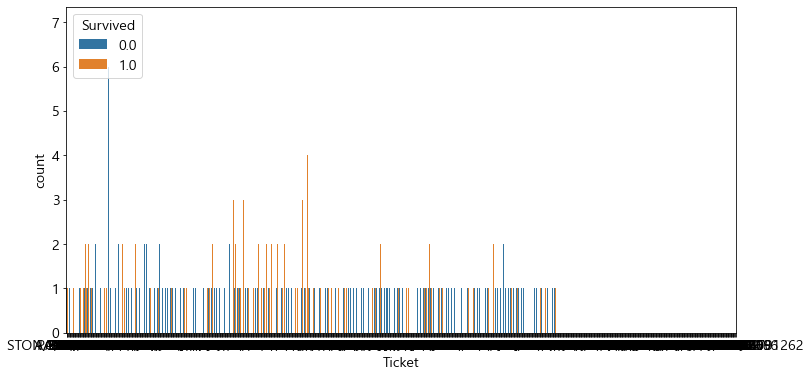

In [33]:
# 시각화
sns.countplot(x='Ticket', hue='Survived', data=data)
plt.show()

#### 티켓 번호가 같은 것 중 일부는 사망 생존률이 올라간다.

### Fare
- 요금

In [34]:
# 결측치 확인
data['Fare'].isna().sum()

1

In [35]:
# 요금 전체의 평균
a1 = data['Fare'].mean()

# 결측치를 채워준다.
data['Fare'].fillna(a1, inplace=True)
data['Fare'].isna().sum()

0

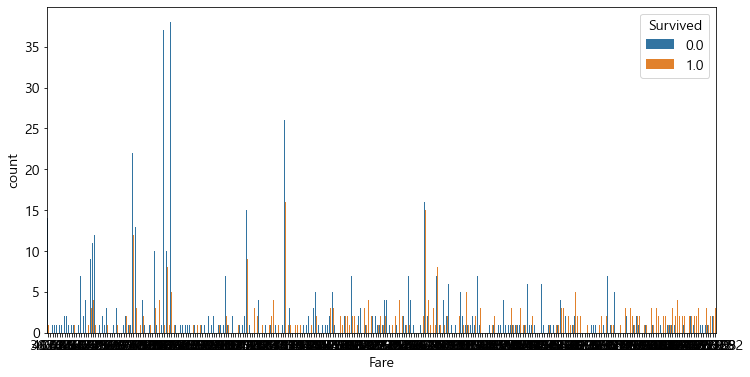

In [36]:
# 시각화
sns.countplot(x='Fare', hue='Survived', data=data)
plt.show()

#### 요금이 비쌀수록 생존 확률이 올라간다.

### Cabin
- 객실

In [37]:
# 결측치 확인
data['Cabin'].isna().sum()

1014

In [38]:
# 객실 번호를 출력한다.
data['Cabin']

0        NaN
1        C85
2        NaN
3       C123
4        NaN
        ... 
1304     NaN
1305    C105
1306     NaN
1307     NaN
1308     NaN
Name: Cabin, Length: 1309, dtype: object

In [39]:
# 앞의 알파벳 부분만 추출한다.
# ([A-Za-z]+) : 앞에 알파베으로 시작하는 것들 중에 한 글자만 가져온다.
data['Cabin2'] = data['Cabin'].str.extract('([A-Za-z]+)')
data['Cabin2']

0       NaN
1         C
2       NaN
3         C
4       NaN
       ... 
1304    NaN
1305      C
1306    NaN
1307    NaN
1308    NaN
Name: Cabin2, Length: 1309, dtype: object

In [40]:
# 1 등석 사람들의 객실정보를 확인한다.
a1 = data.query('Pclass == 1')
a1['Cabin2'].value_counts()

C    94
B    65
D    40
E    34
A    22
T     1
Name: Cabin2, dtype: int64

In [41]:
# 2 등석 사람들의 객실정보를 확인한다.
a1 = data.query('Pclass == 2')
a1['Cabin2'].value_counts()

F    13
D     6
E     4
Name: Cabin2, dtype: int64

In [42]:
# 3 등석 사람들의 객실정보를 확인한다.
a1 = data.query('Pclass == 3')
a1['Cabin2'].value_counts()

F    8
G    5
E    3
Name: Cabin2, dtype: int64

In [43]:
# 각 Pclass에만 있는 객실로 셋팅하는 방법
# 가상의 객실로 셋팅하는 방법
# 컬럼을 제거

# 컬럼을 제거
data.drop(['Cabin', 'Cabin2'], axis=1, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,SirName
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Braund,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Cumings,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Futrelle,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,S,Spector,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,Oliva,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,S,Ware,Mr


### Embarked
- 선착장

In [44]:
# 결측치 확인
data['Embarked'].isna().sum()

2

In [45]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [46]:
# 결측치를 가장 많은 S로 채워준다.
data['Embarked'].fillna('S', inplace=True)
data['Embarked'].isna().sum()

0

<AxesSubplot:xlabel='Embarked', ylabel='count'>

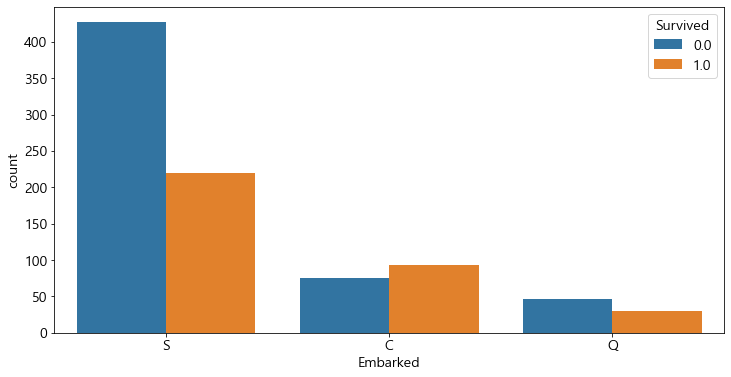

In [47]:
sns.countplot(x='Embarked', hue='Survived', data=data)

#### S에서 탑승한 승객은 사망 확률이 높다.

### 머신러닝 데이터 전처리
- 결측치 처리
- 문자열 -> 숫자

In [48]:
# 전체 결측치 확인
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
LastName         0
SirName          0
dtype: int64

In [49]:
# 컬럼 이름 확인
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'LastName', 'SirName'],
      dtype='object')

In [50]:
# 원본 유지를 위해 데이터 프레임을 복제한다.
df1 = data.copy()
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,SirName
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Braund,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Cumings,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Futrelle,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,S,Spector,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,Oliva,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,S,Ware,Mr


In [51]:
# 불필요한 컬럼 제거
# PassengerId: 쓸데없음
# Survived: 원본 데이터에 쓰면 됨
# Name: LastName,SirName 쓸거임
drop_list = ['PassengerId', 'Survived', 'Name']
df1.drop(drop_list, axis=1, inplace=True)
df1

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,SirName
0,3,male,22.000000,1,0,A/5 21171,7.2500,S,Braund,Mr
1,1,female,38.000000,1,0,PC 17599,71.2833,C,Cumings,Mrs
2,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss
3,1,female,35.000000,1,0,113803,53.1000,S,Futrelle,Mrs
4,3,male,35.000000,0,0,373450,8.0500,S,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,3,male,32.252151,0,0,A.5. 3236,8.0500,S,Spector,Mr
1305,1,female,39.000000,0,0,PC 17758,108.9000,C,Oliva,Dona
1306,3,male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr
1307,3,male,32.252151,0,0,359309,8.0500,S,Ware,Mr


In [52]:
# 문자 데이터를 숫자로 변형한다.
df1['Sex'] = df1['Sex'].factorize()[0]
df1['Ticket'] = df1['Ticket'].factorize()[0]
df1['Embarked'] = df1['Embarked'].factorize()[0]
df1['LastName'] = df1['LastName'].factorize()[0]
df1['SirName'] = df1['SirName'].factorize()[0]
df1

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,SirName
0,3,0,22.000000,1,0,0,7.2500,0,0,0
1,1,1,38.000000,1,0,1,71.2833,1,1,1
2,3,1,26.000000,0,0,2,7.9250,0,2,2
3,1,1,35.000000,1,0,3,53.1000,0,3,1
4,3,0,35.000000,0,0,4,8.0500,0,4,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,32.252151,0,0,926,8.0500,0,850,0
1305,1,1,39.000000,0,0,273,108.9000,1,851,17
1306,3,0,38.500000,0,0,927,7.2500,0,852,0
1307,3,0,32.252151,0,0,928,8.0500,0,799,0


In [53]:
# 모든 컬럼의 값의 표준 편차를 비슷한 수준으로 맞춘다.
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler1.fit(df1)
df1 = scaler1.transform(df1)
df1

array([[ 0.84191642, -0.74349692, -0.5987593 , ..., -0.60343572,
        -1.47099643, -0.54203347],
       [-1.54609786,  1.34499549,  0.61439473, ...,  0.92737312,
        -1.46694979,  0.05320295],
       [ 0.84191642,  1.34499549, -0.29547079, ..., -0.60343572,
        -1.46290314,  0.64843937],
       ...,
       [ 0.84191642, -0.74349692,  0.65230579, ..., -0.60343572,
         1.97674332, -0.54203347],
       [ 0.84191642, -0.74349692,  0.17858063, ..., -0.60343572,
         1.76227125, -0.54203347],
       [ 0.84191642, -0.74349692, -1.85114055, ...,  0.92737312,
        -1.00158585,  1.24367579]])

In [54]:
# 학습데이터와 예측데이터로 나눈다.
# 학습데이터의 개수를 구한다.
n_train = len(train_df)
print(n_train)

891


In [56]:
X_train = df1[:n_train]
X_test = df1[n_train:]
# X_test.reset_index(inplace=True, drop=True)
y_train = train_df['Survived']

display(X_train)
display(X_test)
display(y_train)

array([[ 0.84191642, -0.74349692, -0.5987593 , ..., -0.60343572,
        -1.47099643, -0.54203347],
       [-1.54609786,  1.34499549,  0.61439473, ...,  0.92737312,
        -1.46694979,  0.05320295],
       [ 0.84191642,  1.34499549, -0.29547079, ..., -0.60343572,
        -1.46290314,  0.64843937],
       ...,
       [ 0.84191642,  1.34499549, -0.61587705, ..., -0.60343572,
         0.92056953,  0.64843937],
       [-1.54609786, -0.74349692, -0.29547079, ...,  0.92737312,
         1.15932146, -0.54203347],
       [ 0.84191642, -0.74349692,  0.15946197, ...,  2.45818196,
         1.1633681 , -0.54203347]])

array([[ 0.84191642, -0.74349692,  0.34901728, ...,  2.45818196,
        -0.42696256, -0.54203347],
       [ 0.84191642,  1.34499549,  1.29679387, ..., -0.60343572,
         1.16741474,  0.05320295],
       [-0.35209072, -0.74349692,  2.43412576, ...,  2.45818196,
         1.17146139, -0.54203347],
       ...,
       [ 0.84191642, -0.74349692,  0.65230579, ..., -0.60343572,
         1.97674332, -0.54203347],
       [ 0.84191642, -0.74349692,  0.17858063, ..., -0.60343572,
         1.76227125, -0.54203347],
       [ 0.84191642, -0.74349692, -1.85114055, ...,  0.92737312,
        -1.00158585,  1.24367579]])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [57]:
# 머신러닝 알고리즘
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [58]:
# 학습한다.
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
# 학습시 사용한 데이터를 가지고 평가한다.
# 학습 데이터를 통해 예측 결과를 가져온다.
pred = model.predict(X_train)
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [60]:
# 진짜 결과와 얼마나 유사한지 확인한다.
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred)

0.8013468013468014